![Lab 3](https://pbs.twimg.com/media/FN0jA-xWYAkgnLy?format=jpg&name=large)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [43]:
# Import Required Libraries for this lab
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
from sklearn.linear_model import LassoLarsIC
from sklearn.preprocessing import LabelEncoder

# Task 1: Interpretation of the model, testing, variable selection.

### Data Preprocessing

In [3]:
# Import Data
df = pd.read_csv("SAheart.data")
df.head(3)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0


In [6]:
# Drop unnecessary col
df = df.drop(columns="row.names")

In [4]:
# Label Encoder for col(famhist)
le = LabelEncoder()
df['famhist'] = le.fit_transform(df['famhist'])

In [11]:
# Define predictor and target attribute
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

### Task A

In [12]:
model = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.533084
         Iterations 6


### Task B

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1737
Time:                        17:07:35   Log-Likelihood:                -246.28
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 3.021e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
row.names     -0.0016      0.001     -1.855      0.064      -0.003       9e-05
sbp           -0.0041      0.005     -0.796      0.426      -0.014       0.006
tobacco        0.0834      0.026      3.184      0.001       0.032       0.135
ldl            0.1566      0.059      2.651      0.008       0.041       0.272
adiposity      0.0673      0.028      2.431      0.015       0.013       0.122
famhist        0.9512      0.225      4.223      0.000       0.510       1.393
typea          0.0087      0.010      0.850      0.395      -0.011       0.029
obesity       -0.1765      0.040     -4.369      0.000      -0.256      -0.097
alcohol        0.0004      0.004      0.080      0.937      -0.008       0.009
age            0.0266      0.011      2.431      0.015       0.005       0.048
==============================================================================
"""

### Task C

In [14]:
np.exp(model.params)

row.names    0.998418
sbp          0.995903
tobacco      1.087025
ldl          1.169513
adiposity    1.069631
famhist      2.588837
typea        1.008706
obesity      0.838190
alcohol      1.000358
age          1.026910
dtype: float64

In [15]:
X.loc[:, 'age'] = X.loc[:, 'age'] + 1

In [17]:
model2 = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.533295
         Iterations 6


In [18]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            9
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1734
Time:                        17:08:43   Log-Likelihood:                -246.38
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 3.309e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
row.names     -0.0016      0.001     -1.860      0.063      -0.003    8.57e-05
sbp           -0.0041      0.005     -0.790      0.430      -0.014       0.006
tobacco        0.0838      0.026      3.197      0.001       0.032       0.135
ldl            0.1566      0.059      2.651      0.008       0.041       0.272
adiposity      0.0680      0.028      2.459      0.014       0.014       0.122
famhist        0.9527      0.225      4.230      0.000       0.511       1.394
typea          0.0086      0.010      0.840      0.401      -0.011       0.029
obesity       -0.1773      0.040     -4.391      0.000      -0.256      -0.098
alcohol        0.0003      0.004      0.077      0.939      -0.008       0.009
age            0.0260      0.011      2.391      0.017       0.005       0.047
==============================================================================
"""

In [19]:
np.exp(model2.params)

row.names    0.998414
sbp          0.995931
tobacco      1.087395
ldl          1.169481
adiposity    1.070384
famhist      2.592598
typea        1.008609
obesity      0.837524
alcohol      1.000345
age          1.026387
dtype: float64

### Task D

#### AIC

In [23]:
AIC = LassoLarsIC('aic', fit_intercept=True).fit(X, Y)
X.shape
AIC.intercept_
AIC.coef_

array([-1.15485003e-04,  1.24822050e-03,  1.55150913e-02,  3.12794235e-02,
        0.00000000e+00,  1.65707953e-01,  5.08310208e-03, -6.36612314e-03,
        0.00000000e+00,  7.05420028e-03])

#### BIC

In [25]:
BIC = LassoLarsIC('bic').fit(X, Y)
BIC.coef_

array([0.        , 0.        , 0.01220892, 0.02117665, 0.        ,
       0.12548867, 0.00230665, 0.        , 0.        , 0.00643216])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Task 2: Problem of linearly separable classes

### Data Preprocessing

In [27]:
df = pd.read_csv("earthquake.txt", delimiter=' ')
df.head(3)

,popn,body,surface
0,equake,5.60,4.25
1,equake,5.18,3.93
2,equake,6.31,6.30


In [28]:
# Label Encoder for col(popn)
le = LabelEncoder()
df['popn'] = le.fit_transform(df['popn'])

In [31]:
#  Define Predictor and Target Attribute
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

### Task A

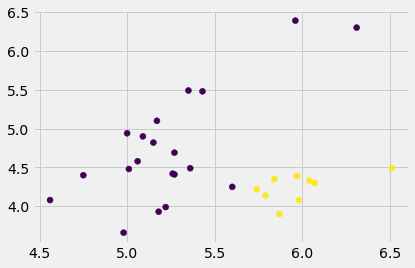

In [36]:
plt.style.use('fivethirtyeight') 
scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y)
plt.show()

### Task B

In [38]:
model = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.102615
         Iterations 12


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   popn   No. Observations:                   29
Model:                          Logit   Df Residuals:                       27
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.8343
Time:                        17:21:13   Log-Likelihood:                -2.9758
converged:                       True   LL-Null:                       -17.962
Covariance Type:            nonrobust   LLR p-value:                 4.383e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
body          22.1747     13.665      1.623      0.105      -4.608      48.958
surface      -29.7928     18.398     -1.619      0.105     -65.851       6.266
==============================================================================

Possibly complete quasi-separation: A fraction 0.66 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [40]:
model.wald_test("(body=0)")

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[2.6332244]], p-value=0.10464899736418969, df_denom=1>

In [41]:
model.wald_test("(surface=0)")

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[2.62241512]], p-value=0.10536396486447026, df_denom=1>

In [42]:
model.wald_test("(body=0, surface=0)")

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=[[2.68714331]], p-value=0.2609121145745657, df_denom=2>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# Task 3: Simulation Example

In [44]:
def MSE(x, y):
    return ((x - y).T @ (x - y)) / len(x)

In [45]:
def experiment(n, L = 50):
    
    mse_list = list()
    
    for i in range(L):
        
        beta = np.array([0.5, 1, 1])

        X = np.c_[np.ones(n), st.multivariate_normal.rvs(mean=[0, 0], cov=[[1, 0], [0, 1]], size=n)]
        p = 1 / (1 + np.exp(-X @ beta))
        y = [st.bernoulli.rvs(i) for i in p]

        log_reg = sm.Logit(y, X).fit()
        beta_estimator = log_reg.params
        mse_list.append(MSE(beta, beta_estimator))

    return np.mean(mse_list)

In [46]:
x = np.arange(50, 310, 10)
y = [experiment(n) for n in x]

Optimization terminated successfully.
         Current function value: 0.570663
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.474747
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517891
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.509867
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.441475
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.474218
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.389009
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.537785
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.478784
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.587598
  

Optimization terminated successfully.
         Current function value: 0.447769
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.516344
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.403881
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.496154
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536555
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.429941
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.519381
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.606802
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571092
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578342
  

Optimization terminated successfully.
         Current function value: 0.496638
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560358
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.550575
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479577
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508809
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.474985
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.513189
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480491
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545662
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566129
  

Optimization terminated successfully.
         Current function value: 0.450414
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.476295
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.454651
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.493993
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536958
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528720
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.551208
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.522309
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535461
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.427182
  

Optimization terminated successfully.
         Current function value: 0.531917
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534070
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.529048
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552662
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.601619
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.512224
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.492891
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433965
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541293
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.501825
  

Optimization terminated successfully.
         Current function value: 0.567569
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.452450
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.523366
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.498390
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.488283
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.518293
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.522279
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.530472
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.476430
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.437923
  

Optimization terminated successfully.
         Current function value: 0.354582
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.490343
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.518693
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.407496
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.575905
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.489703
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.542484
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543336
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.470087
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.455444
  

Optimization terminated successfully.
         Current function value: 0.524640
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536704
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559891
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.567348
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.536593
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545761
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.522296
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525548
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564595
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525374
  

Optimization terminated successfully.
         Current function value: 0.522163
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467928
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.533539
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.560050
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.531959
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.477950
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.487210
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.554957
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549943
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528709
  

Optimization terminated successfully.
         Current function value: 0.500103
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.481224
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.591833
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.485404
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532479
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517810
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.497457
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.525781
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.468479
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.549030
  

         Current function value: 0.524471
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.564627
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.499122
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.504823
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.488746
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512126
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.508507
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535649
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.561861
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547349
         Iterations 6
Optimization termi

Optimization terminated successfully.
         Current function value: 0.545281
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.566203
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.571192
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.537060
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556550
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.540758
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.468168
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.572073
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.553219
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.532297
  

Optimization terminated successfully.
         Current function value: 0.509781
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.544465
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.493679
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.523958
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.490384
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.442570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.541714
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.467781
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.511401
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.516859
  

Optimization terminated successfully.
         Current function value: 0.521552
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.506787
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.500280
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.528813
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539103
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.526948
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.518245
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515185
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.555696
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.503794
  

Optimization terminated successfully.
         Current function value: 0.552363
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.524914
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558536
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.520876
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.498149
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.556042
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.446414
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.546271
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.531063
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.480510
  

Optimization terminated successfully.
         Current function value: 0.554009
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491246
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.488303
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539538
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.489596
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515192
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.465867
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.545756
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547487
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515194
  

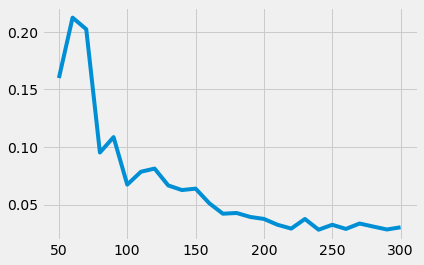

In [47]:
plt.plot(x, y)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)